<a href="https://colab.research.google.com/github/drmehmetyegin/GHFiles/blob/main/Assignment_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLRSWY
Deep Learning

Assignment-2 (CNN)

Image Classification with CNN

Task and Dataset Info¶
Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 grayscale images. There is a training set of 60,000 images and 10,000 test images.

Label    Description
0        T-shirt/top
1        Trouser
2        Pullover
3        Dress
4        Coat
5        Sandal
6        Shirt
7        Sneaker
8        Bag
9        Ankle boot

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

Recognizing and Understanding Data¶
TASK 1: Run the code below to download the dataset using Keras.

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# y's are labels

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.

In [7]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

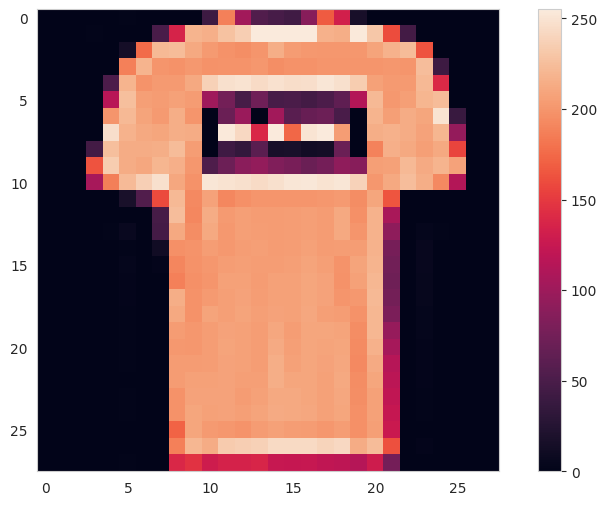

In [8]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [9]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


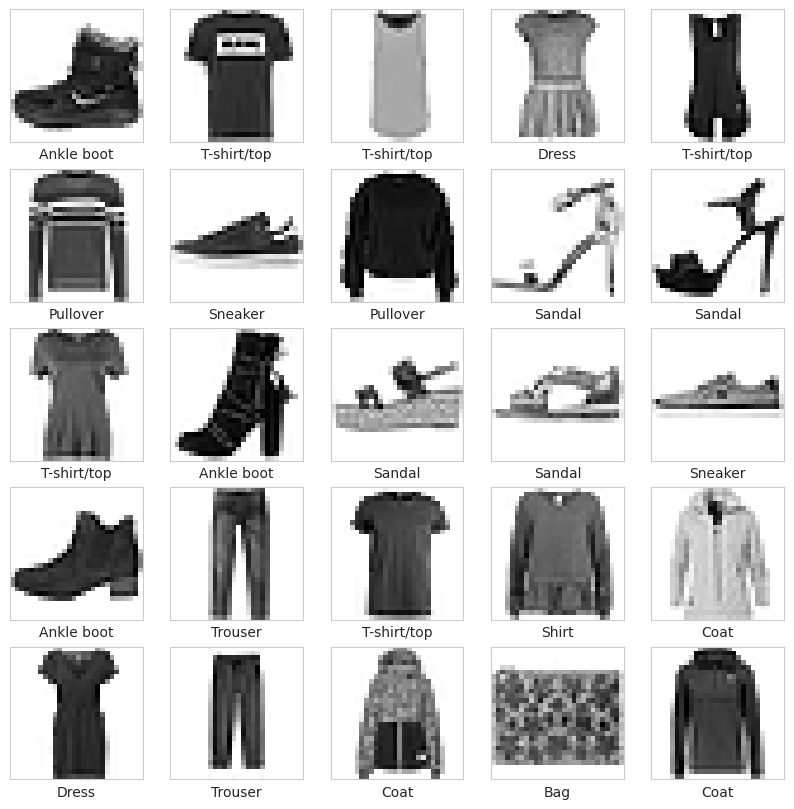

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()


Data Preprocessing
TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.

In [11]:
x_train[9].min(), x_train[9].max()

(0, 255)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255

In [13]:
x_train[9].min(), x_train[9].max()

(0.0, 1.0)

In [14]:
print(x_train[1])

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078432 0.7372549
  0.40392157 0.21176471 0.1882353  0.16862746 0.34117648 0.65882355
  0.52156866 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215687 0.53333336 0.85882354 0.84705883 0.89411765
  0.9254902  1.         1.         1.         1.         0.8509804
  0.84313726 0.99607843 0.90588236 0.627451   0.1764706  0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.6901961  0.87058824 0.8784314  0.83137256 0.79607844 0.7764706
  0.76862746 0.78431374 0.84313726 0.8        0.7921569  0.7882353
  0.7882353  0.7882353  0.81960785 0.85490197 0.8784314  0.6431373
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
  0.8

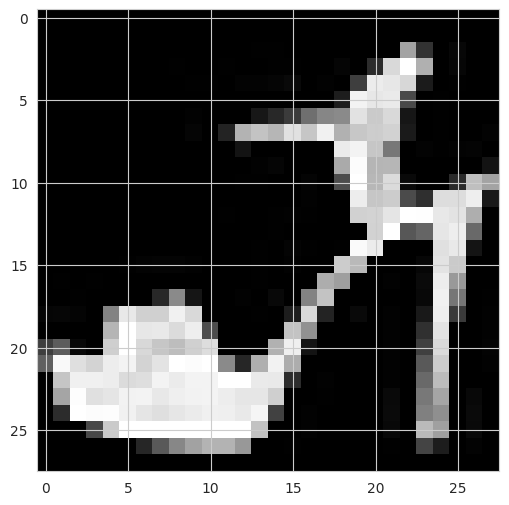

In [15]:
plt.imshow(x_train[9],cmap='gray')
# scaled, but no problem

Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.

In [16]:
x_train.reshape(60000, 28, 28, 1).shape


# model kanal sayısını istiyor çünkü ona göre filtreleri vs ayarlıyor.

(60000, 28, 28, 1)

In [17]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# kanal sayısının ne olduğunu da belirttik.

In [18]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
y_train, y_train.shape

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8), (60000,))

TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train_c = to_categorical(y_train, 10) 
y_test_c = to_categorical(y_test, 10)
y_train_c.shape, y_test_c.shape

((60000, 10), (10000, 10))

In [22]:
y_train_c[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [23]:
y_train_c[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

###Modeling
Create the model
TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):

2D Convolutional Layer, filters=28 and kernel_size=(3,3)

Pooling Layer where pool_size = (2,2) strides=(1,1)

Flatten Layer

Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

Final Dense Layer of 10 Neurons with a softmax activation

Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) 

model.add(Flatten()) # flatten ile vektörel hale getirip ann yapısına geçiyoruz.

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##Model Training¶
TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.

In [27]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [30]:
model.fit(x_train, y_train_c, batch_size=32, epochs=100, validation_data=(x_test, y_test_c), callbacks=[early_stop]) 

Epoch 1/100
1875/1875 [==============================] - 18s 4ms/step - loss: 0.3811 - accuracy: 0.8651 - val_loss: 0.2968 - val_accuracy: 0.8941
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2474 - accuracy: 0.9093 - val_loss: 0.2706 - val_accuracy: 0.9021
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2065 - accuracy: 0.9242 - val_loss: 0.2750 - val_accuracy: 0.9105
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1787 - accuracy: 0.9348 - val_loss: 0.2629 - val_accuracy: 0.9086
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1552 - accuracy: 0.9446 - val_loss: 0.2794 - val_accuracy: 0.9076


TASK 7: Plot values of metrics you used in your model.

In [31]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.381,0.865,0.297,0.894
1,0.247,0.909,0.271,0.902
2,0.207,0.924,0.275,0.910
3,0.179,0.935,0.263,0.909
4,0.155,0.945,0.279,0.908


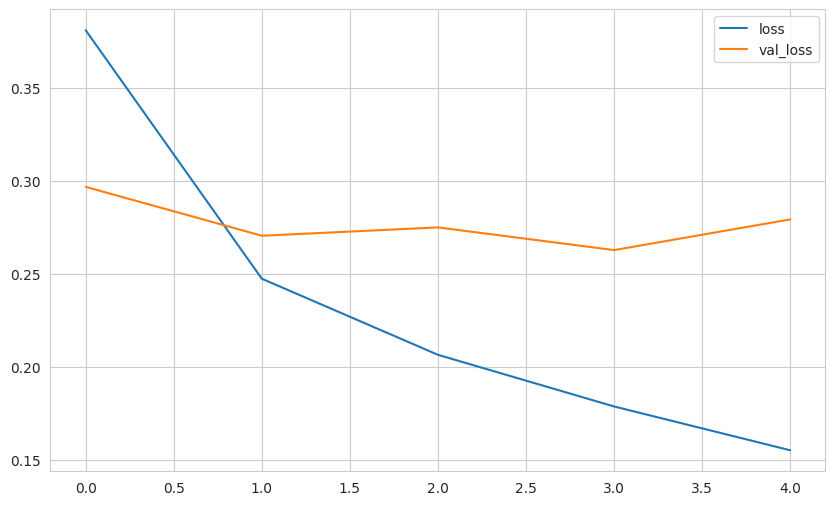

In [32]:
summary[["loss", "val_loss"]].plot();

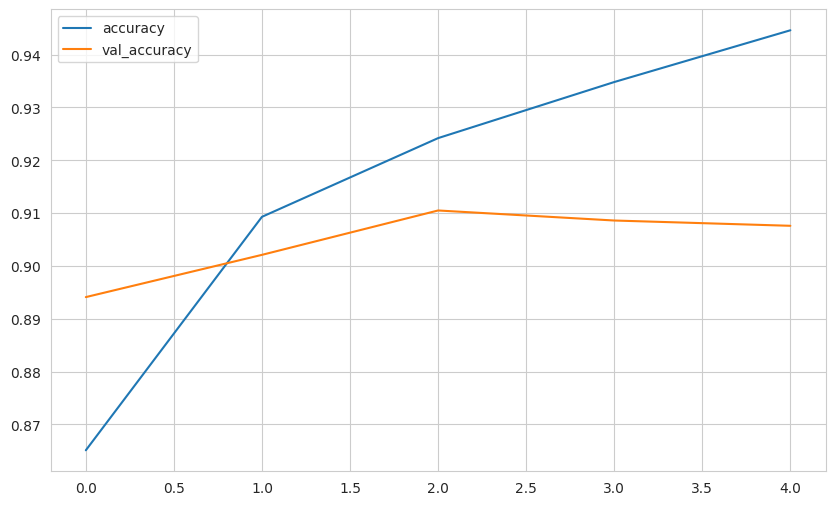

In [33]:
summary[["accuracy", "val_accuracy"]].plot();

##Model Evaluation
TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.

In [34]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [35]:
model.evaluate(x_test, y_test_c)

313/313 [==============================] - 1s 3ms/step - loss: 0.2750 - accuracy: 0.9105


[0.27504822611808777, 0.9104999899864197]

In [36]:
score = model.evaluate(x_test, y_test_c, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27504822611808777
Test accuracy: 0.9104999899864197


In [37]:
pred_prob = model.predict(x_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[0.00000017, 0.        , 0.00000168, ..., 0.00043114, 0.00000495,
        0.99894637],
       [0.00000004, 0.        , 0.9999994 , ..., 0.        , 0.        ,
        0.        ],
       [0.00000003, 0.9999994 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00000037, 0.        , 0.0000019 , ..., 0.00000024, 0.99947375,
        0.00000002],
       [0.00000002, 0.9999912 , 0.00000002, ..., 0.00000002, 0.        ,
        0.00000001],
       [0.00017703, 0.00000646, 0.00070461, ..., 0.02249734, 0.00093795,
        0.0006026 ]], dtype=float32)

In [38]:
pred_prob.shape

(10000, 10)

In [39]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [40]:
y_pred.shape

(10000,)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1000
           1       1.00      0.96      0.98      1000
           2       0.83      0.89      0.86      1000
           3       0.87      0.94      0.90      1000
           4       0.85      0.85      0.85      1000
           5       0.97      0.99      0.98      1000
           6       0.79      0.73      0.76      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [42]:
print(confusion_matrix(y_test, y_pred))

[[839   0  27  34   2   3  87   0   8   0]
 [  1 965   1  23   6   1   2   0   1   0]
 [ 11   0 887   8  49   0  44   0   1   0]
 [  5   2  12 936  25   0  19   0   1   0]
 [  1   0  79  27 850   1  42   0   0   0]
 [  0   0   0   0   0 990   0   8   0   2]
 [ 83   0  66  38  69   0 731   0  13   0]
 [  0   0   0   0   0  17   0 966   0  17]
 [  2   0   0   4   0   1   4   2 987   0]
 [  0   0   0   0   0  12   0  34   0 954]]


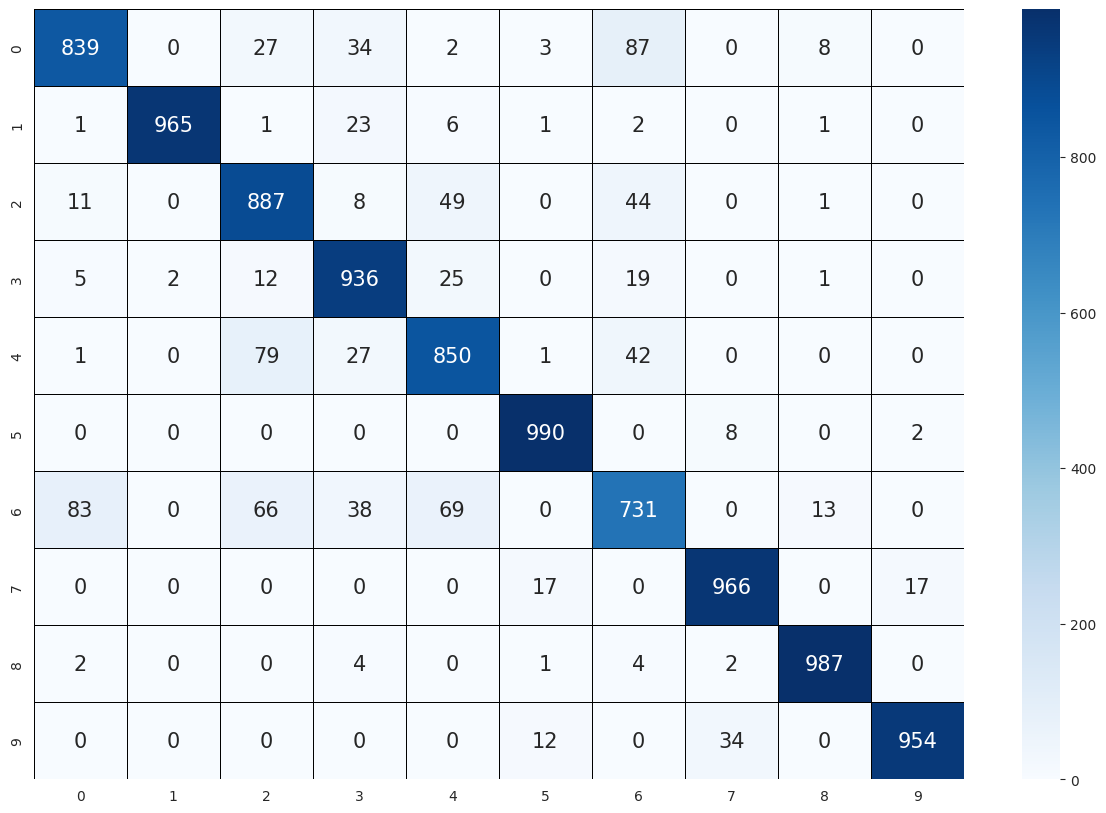

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            cmap="Blues", 
            linewidths=.5, 
            linecolor='black', 
            fmt='g', 
            annot_kws = {"size": 15});

In [44]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [45]:
np.not_equal(y_test, y_pred).sum()

895

In [46]:
np.equal(y_test, y_pred).sum()

9105

###Another Model

Modelimizin sonuçları overfittinge gittiği için iki yöntem ile normalization yapacağız.

Double-click (or enter) to edit

In [48]:
from tensorflow.keras.layers import BatchNormalization

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [51]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1))) 
model.add(Dropout(0.5))
model.add(Flatten()) # flatten ile vektörel hale getirip ann yapısına geçiyoruz.

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 25, 25, 28)        0         
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [53]:
model.fit(x_train, y_train_c, batch_size=24, epochs=50, validation_data=(x_test, y_test_c), callbacks=[early_stop]) 

Epoch 1/50
2500/2500 [==============================] - 13s 5ms/step - loss: 0.4748 - accuracy: 0.8401 - val_loss: 0.3243 - val_accuracy: 0.8838
Epoch 2/50
2500/2500 [==============================] - 12s 5ms/step - loss: 0.3548 - accuracy: 0.8788 - val_loss: 0.3084 - val_accuracy: 0.8908
Epoch 3/50
2500/2500 [==============================] - 12s 5ms/step - loss: 0.3241 - accuracy: 0.8881 - val_loss: 0.2963 - val_accuracy: 0.8953
Epoch 4/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.3101 - accuracy: 0.8935 - val_loss: 0.3511 - val_accuracy: 0.8739
Epoch 5/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2967 - accuracy: 0.8979 - val_loss: 0.2715 - val_accuracy: 0.9039
Epoch 6/50
2500/2500 [==============================] - 11s 5ms/step - loss: 0.2903 - accuracy: 0.9006 - val_loss: 0.2764 - val_accuracy: 0.9036
Epoch 7/50
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2800 - accuracy: 0.9030 - val_loss: 0.2875 - val_ac

In [54]:
summary2 = pd.DataFrame(model.history.history)
summary2.head(10)



,loss,accuracy,val_loss,val_accuracy
0,0.475,0.840,0.324,0.884
1,0.355,0.879,0.308,0.891
2,0.324,0.888,0.296,0.895
3,0.310,0.894,0.351,0.874
4,0.297,0.898,0.272,0.904
5,0.290,0.901,0.276,0.904
6,0.280,0.903,0.287,0.901


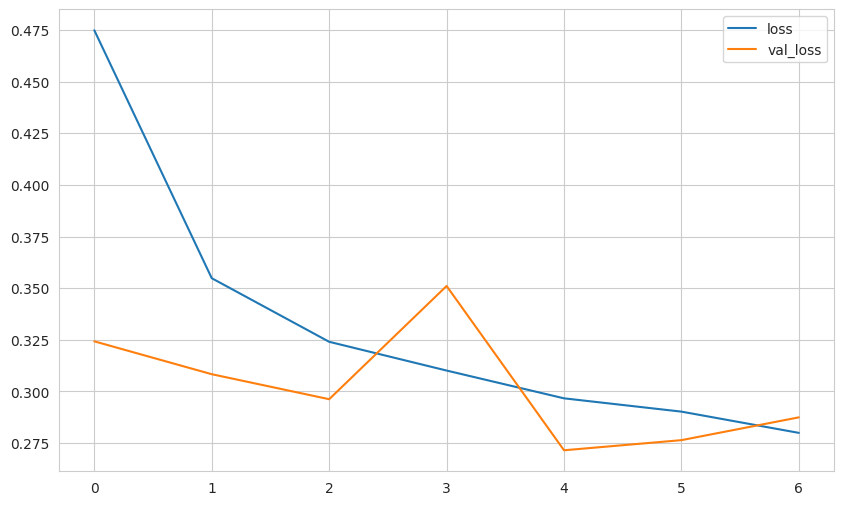

In [55]:
summary2[["loss", "val_loss"]].plot();

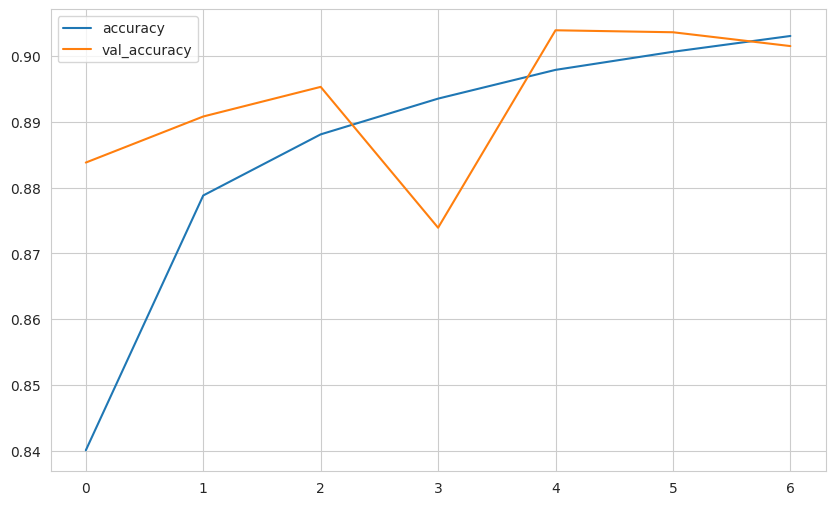

In [56]:
summary2[["accuracy", "val_accuracy"]].plot();

Our accuracy had dropped but we get over the overfitting

## Prediction


In [57]:
my_shape = x_test[13]
my_shape.shape

(28, 28, 1)

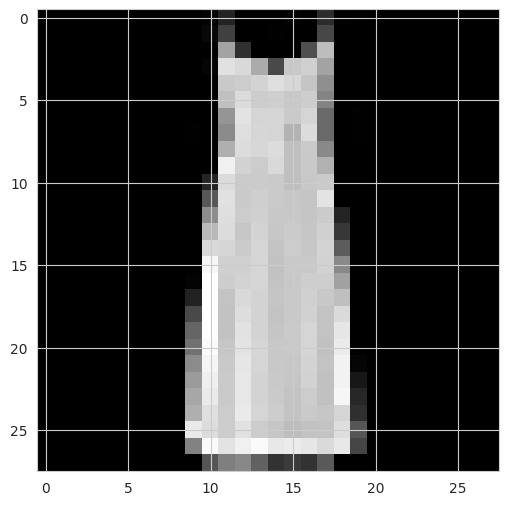

In [58]:
plt.imshow(my_shape, cmap="gray")
plt.show()

In [59]:
pred_prob = model.predict(my_shape.reshape(1,28,28,1)) # only one picture
pred_prob

1/1 [==============================] - 0s 107ms/step


array([[0.00010719, 0.00005273, 0.0000264 , 0.9996402 , 0.00001384,
        0.00000308, 0.00007495, 0.00000181, 0.00006704, 0.00001269]],
      dtype=float32)

In [60]:
y_pred = np.argmax(pred_prob)
y_pred

3

In [61]:
model.save("assig2-cnn.h5")

Modelimizin sonuçları overfittinge gittiği için normalization yapacağız.